In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
data = np.loadtxt('planets_python1.csv', skiprows=1, delimiter=',') # load in data from file
nrows = data.shape[0] # extract the number of columns
ncols = data.shape[1] # extract the number of rows (excluding the column headers)
masses = data[:,9] # get the masses of stars, in solar units
radii = data[:,8] # get the radii of stars, in solar units
temps = data[:,10] # get the effective temperatures of stars, in Kelvin
print "There are {:d} rows (excluding the column titles) and {:d} columns in this file.".format(nrows, ncols)

There are 4376 rows (excluding the column titles) and 14 columns in this file.


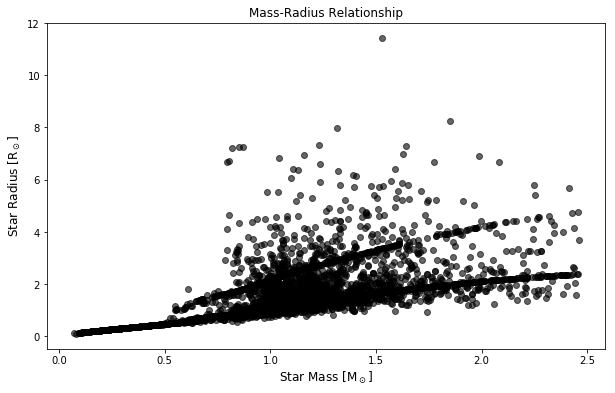

In [80]:
fig = plt.figure(figsize=(10,6)) # create an instance of a figure object
ax = fig.add_subplot(1,1,1) # create an axes object with 1 subplot
ax.set_xlabel(r'Star Mass [M$_\odot$]', fontsize=12) # set the x-axis label
ax.set_ylabel(r'Star Radius [R$_\odot$]', fontsize=12) # set the y-axis label
ax.set_title('Mass-Radius Relationship', fontsize=12) # give the plot a title, even if it isn't great

ax.scatter(masses, radii, color='k', alpha=0.6) # plot the data; make somewhat transparent to better see distribution

plt.show() # display figure
fig.savefig('Scatter_Plot.pdf') # save figure as a pdf

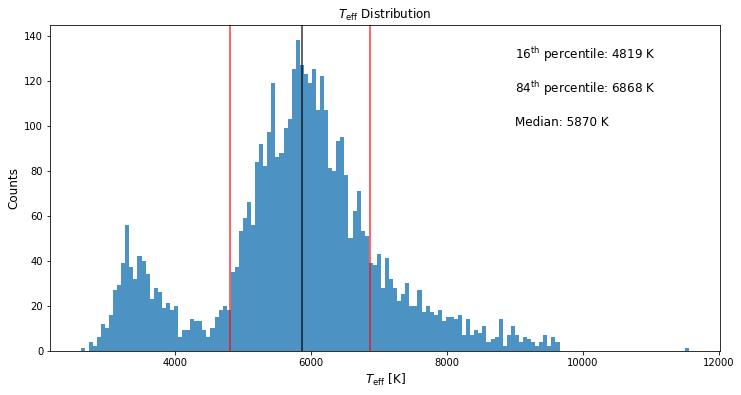

In [81]:
# same initial procedure for generating a figure as above
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r'$T_\mathrm{eff}$ [K]', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title(r'$T_\mathrm{eff}$ Distribution', fontsize=12)

# use matplotlib's built-in histogram method to make a histogram of effective temperatures
ax.hist(temps, bins=150, range=(temps.min(),temps.max()), alpha=0.8)

# use vertical lines to mark 16th and 84th percentiles, as well as median
ax.axvline(np.percentile(temps,16), color='red', alpha=0.8)
ax.axvline(np.percentile(temps,84), color='red', alpha=0.8)
ax.axvline(np.median(temps), color='k', alpha=0.8)

# annotate figure with values of requested percentiles and median
ax.text(9000,130, r'16$^\mathrm{th}$ percentile: %d K' %int(np.percentile(temps,16)), fontsize=12)
ax.text(9000,115, r'84$^\mathrm{th}$ percentile: %d K' %int(np.percentile(temps,84)), fontsize=12)
ax.text(9000,100, r'Median: {:d} K'.format(int(np.median(temps))), fontsize=12)

# show figure in notebook and save figure as pdf
plt.show()
fig.savefig('Histogram.pdf')

In [82]:
# define important quantities for search through data
# decided to look for stars with effective temperatures between
# 5500 and 6500 K, with radii within a factor of two of the Sun's

# temperature search parameters
Tmin = 5500
Tmax = 6500
Tmid = 0.5*(Tmax + Tmin)
Rt = (Tmax - Tmin)/2

# radius search parameters
Rmin = 0.5
Rmax = 2
Rmid = 0.5*(Rmin + Rmax)
Rr = (Rmax - Rmin)/2

In [83]:
# generate keys for searching through data array

# note that the same result is not produced if the radii array
# is not modified by key1. this is the method for searching for
# values within a certain range that makes the most sense to me.
key1 = np.where(np.abs(temps-Tmid)<Rt)
key2 = np.where(np.abs(radii[key1]-Rmid)<Rr)

In [99]:
print "There are {:d} stars which satisfy the specified search parameters.".format(len(temps[key1][key2]))
print "\nThe search parameters are:"
print "Effective temperatures between {:d} K and {:d} K".format(Tmin,Tmax)
print "Radii between {:2.1f} and {:2.1f} solar radii".format(Rmin, Rmax)

There are 1350 stars which satisfy the specified search parameters.

The search parameters are:
Effective temperatures between 5500 K and 6500 K
Radii between 0.5 and 2.0 solar radii
